# Growth rates for all time points

This notebook plot the moscot and cl-TOME growth rates for all time pairs

In [1]:
import numpy as np
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [2]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11,6)})

import mplscience

mplscience.set_style(reset_current=True)
plt.rcParams['figure.dpi'] = 300

In [3]:
Path="/home/mgander/mouse_atlas/data"

# Define time points
t=[3.5, 4.5, 5.25, 5.5]+[6.25+x/4 for x in range(0,10)]+[8.5]+[9.5+x for x in range(0,5)]
ts=[str(a) for a in [3.5, 4.5, 5.25, 5.5, 6.25]] + [str(a) for a in np.arange(6.5, 8.5, 0.25)] + ['8.5a', '8.5b']+ [str(a) for a in np.arange(9.5, 14.5, 1)]
ts=['E'+a for a in ts]

In [4]:
def load_growth_rates(ts0, ts1, i):
    
    obs=pd.read_pickle(f'{Path}/Comb_anndatas/obs/{ts0}_obs.pkl')
    grM=pd.read_pickle(f'{Path}/moscot_maps/growth_rates_and_pulls3/{ts0}_{ts1}_growth_rates.pkl')
    #grM=grM.loc[obs.index]
    # Check if indices match
    assert list(grM.index)==list(obs.index)

    grT=np.load(f'{Path}/TOME_maps/growth_rates_and_pulls/{ts0}_growth_rates.npy')
    obs['growth_rate_moscot']=grM['trained_growth_rate']
    obs['growth_rate_clTOME']=grT
    obs['Cell type']=obs['cell_type']      
    return(obs)

In [5]:
sc.settings.verbosity = 0

In [6]:
def get_ylim(df, xmax):
    cts=list(set(df['cell_type']))
    maxs=[]

    for ct in cts:
        dfs=df[df['cell_type']==ct]

        np_moscot_hist=np.histogram(dfs['growth_rate_moscot'], bins=np.linspace(0,xmax,50))[0]
        np_clTOME_hist=np.histogram(dfs['growth_rate_clTOME'], bins=np.linspace(0,xmax,50))[0]

        maxs.append(max(max(np_moscot_hist), max(np_clTOME_hist)))
    return(max(maxs))

In [8]:
T={}
for i in range(19):
    ts0=ts[i]
    print(ts0)
    ts1=ts[i+1]
    A0obs=load_growth_rates(ts0, ts1, i)
    
    # Restricting to the k=5 cell types with the most cells

    k=5
    cts=list(A0obs['cell_type'].value_counts().index)[:k]
    A0s=A0obs[A0obs['cell_type'].isin(cts)].copy()
    A0s['Cell type']=list(A0s['Cell type'])
    
    T[i]=A0s

E3.5
E4.5
E5.25
E5.5
E6.25
E6.5
E6.75
E7.0
E7.25
E7.5
E7.75
E8.0
E8.25
E8.5a
E8.5b
E9.5
E10.5
E11.5
E12.5


# Pre-Gastrulation

In [9]:
palette=sns.color_palette('tab20')

In [10]:
n0=0
n1=5

cell_types=[]

for i in range(n0,n1):
    df=T[i]
    cell_types=[*cell_types, *list(set(df['cell_type']))]
cell_types=sorted(list(set(cell_types)))
D_color={}

for i,ct in zip(range(len(cell_types)),cell_types):
    D_color[ct]=palette[i]

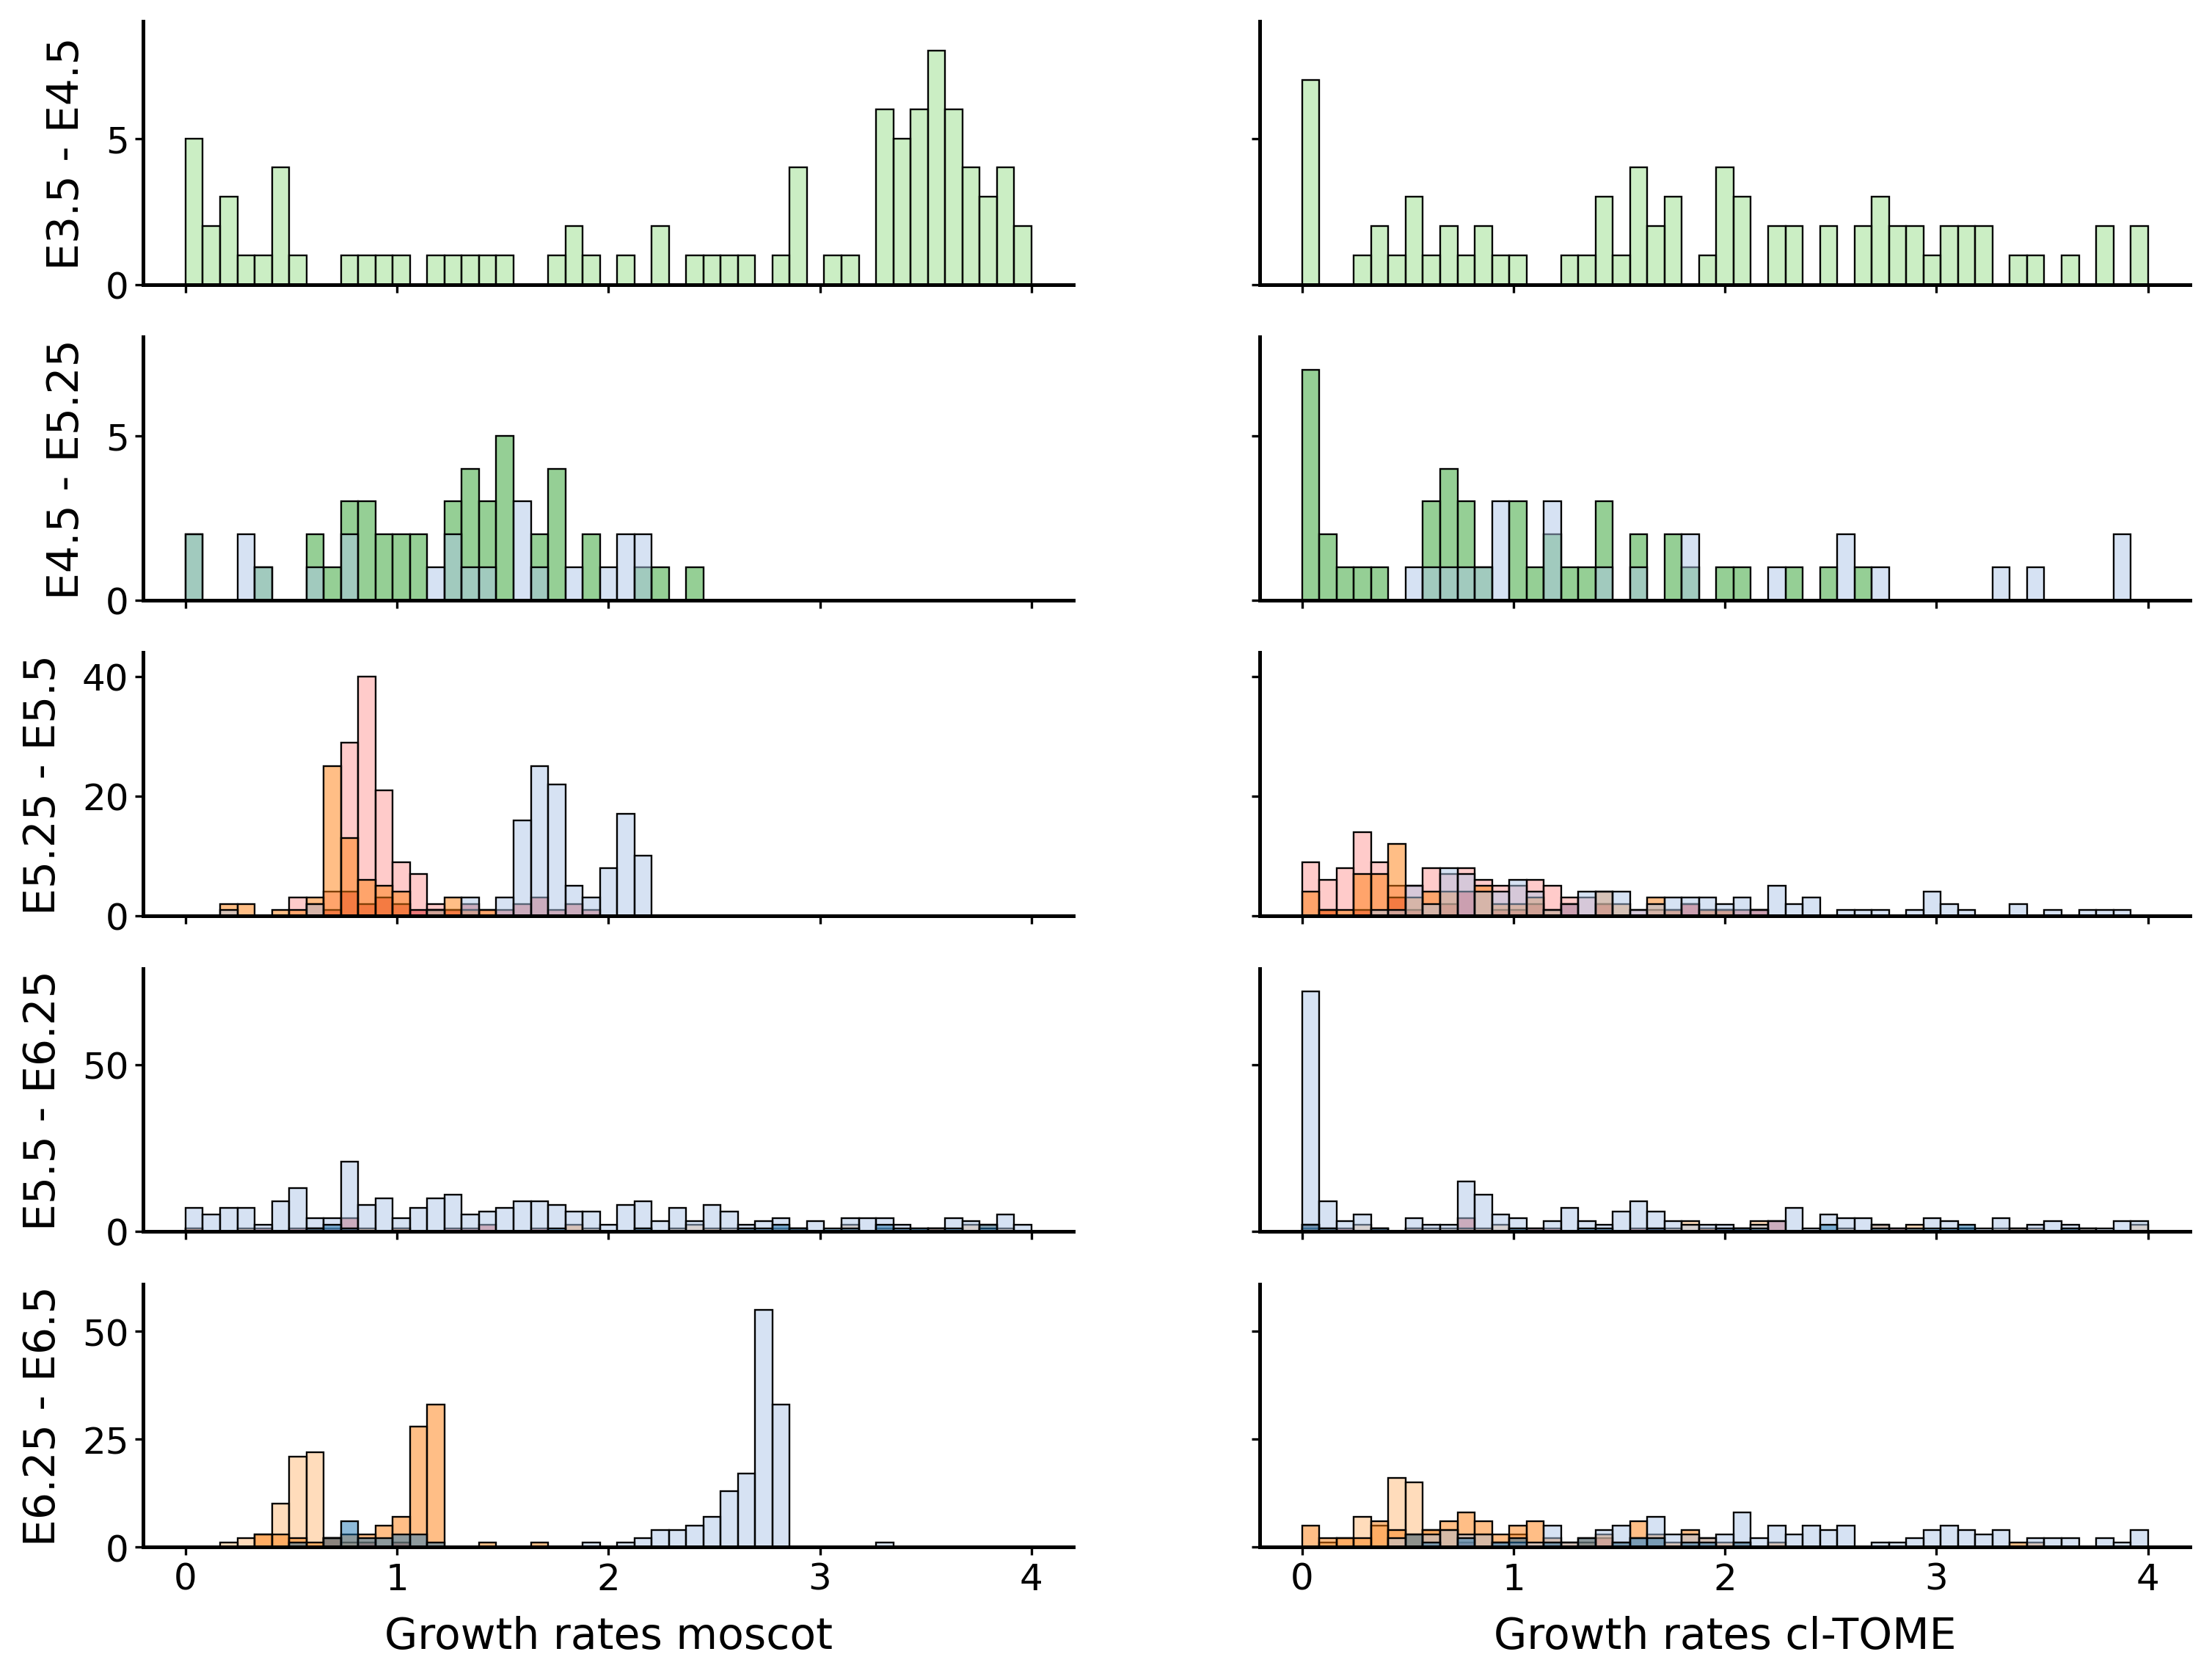

In [11]:
xmax=4

fig, axs = plt.subplots(n1-n0, 2, figsize=(12, (n1-n0)*1.8))

for i in range(n0,n1):
    df=T[i]
    df=df.sort_values('Cell type')
    local_palette=[D_color[a] for a in sorted(list(set(df['Cell type'])))]
    
    
    ylim=int(round(get_ylim(df, xmax)*1.1))

    g0=sns.histplot(data=df, x="growth_rate_moscot", hue='Cell type', palette=local_palette, bins=np.linspace(0,4,50), ax=axs[i-n0, 0])
    axs[i-n0, 0].legend_.remove()
    axs[i-n0, 0].set_ylim(0, ylim)
    if i<n1-1:
        g0.set(xticklabels=[])  # remove the tick labels
        g0.set(xlabel=None)  # remove the axis label
    else:
        g0.set(xlabel='Growth rates moscot')  # remove the axis label

    g0.set(ylabel=f'{ts[i]} - {ts[i+1]}')
    
    g1=sns.histplot(data=df, x="growth_rate_clTOME", hue='Cell type', palette=local_palette, bins=np.linspace(0,4,50), ax=axs[i-n0, 1])
    #sns.move_legend(g1,(1,0))
    plt.setp(g1.get_legend().get_title(), fontsize='12')
    axs[i-n0, 1].legend_.remove()
    
    if i<n1-1:
        g1.set(xticklabels=[])  # remove the tick labels
        g1.set(xlabel=None)  # remove the axis label
    else:
        g1.set(xlabel='Growth rates cl-TOME')  # remove the axis label
    g1.set(yticklabels=[])  # remove the tick labels
    g1.set(ylabel=None)  # remove the axis label
    
    axs[i-n0, 1].set_ylim(0, ylim)
plt.show()

[None, None]

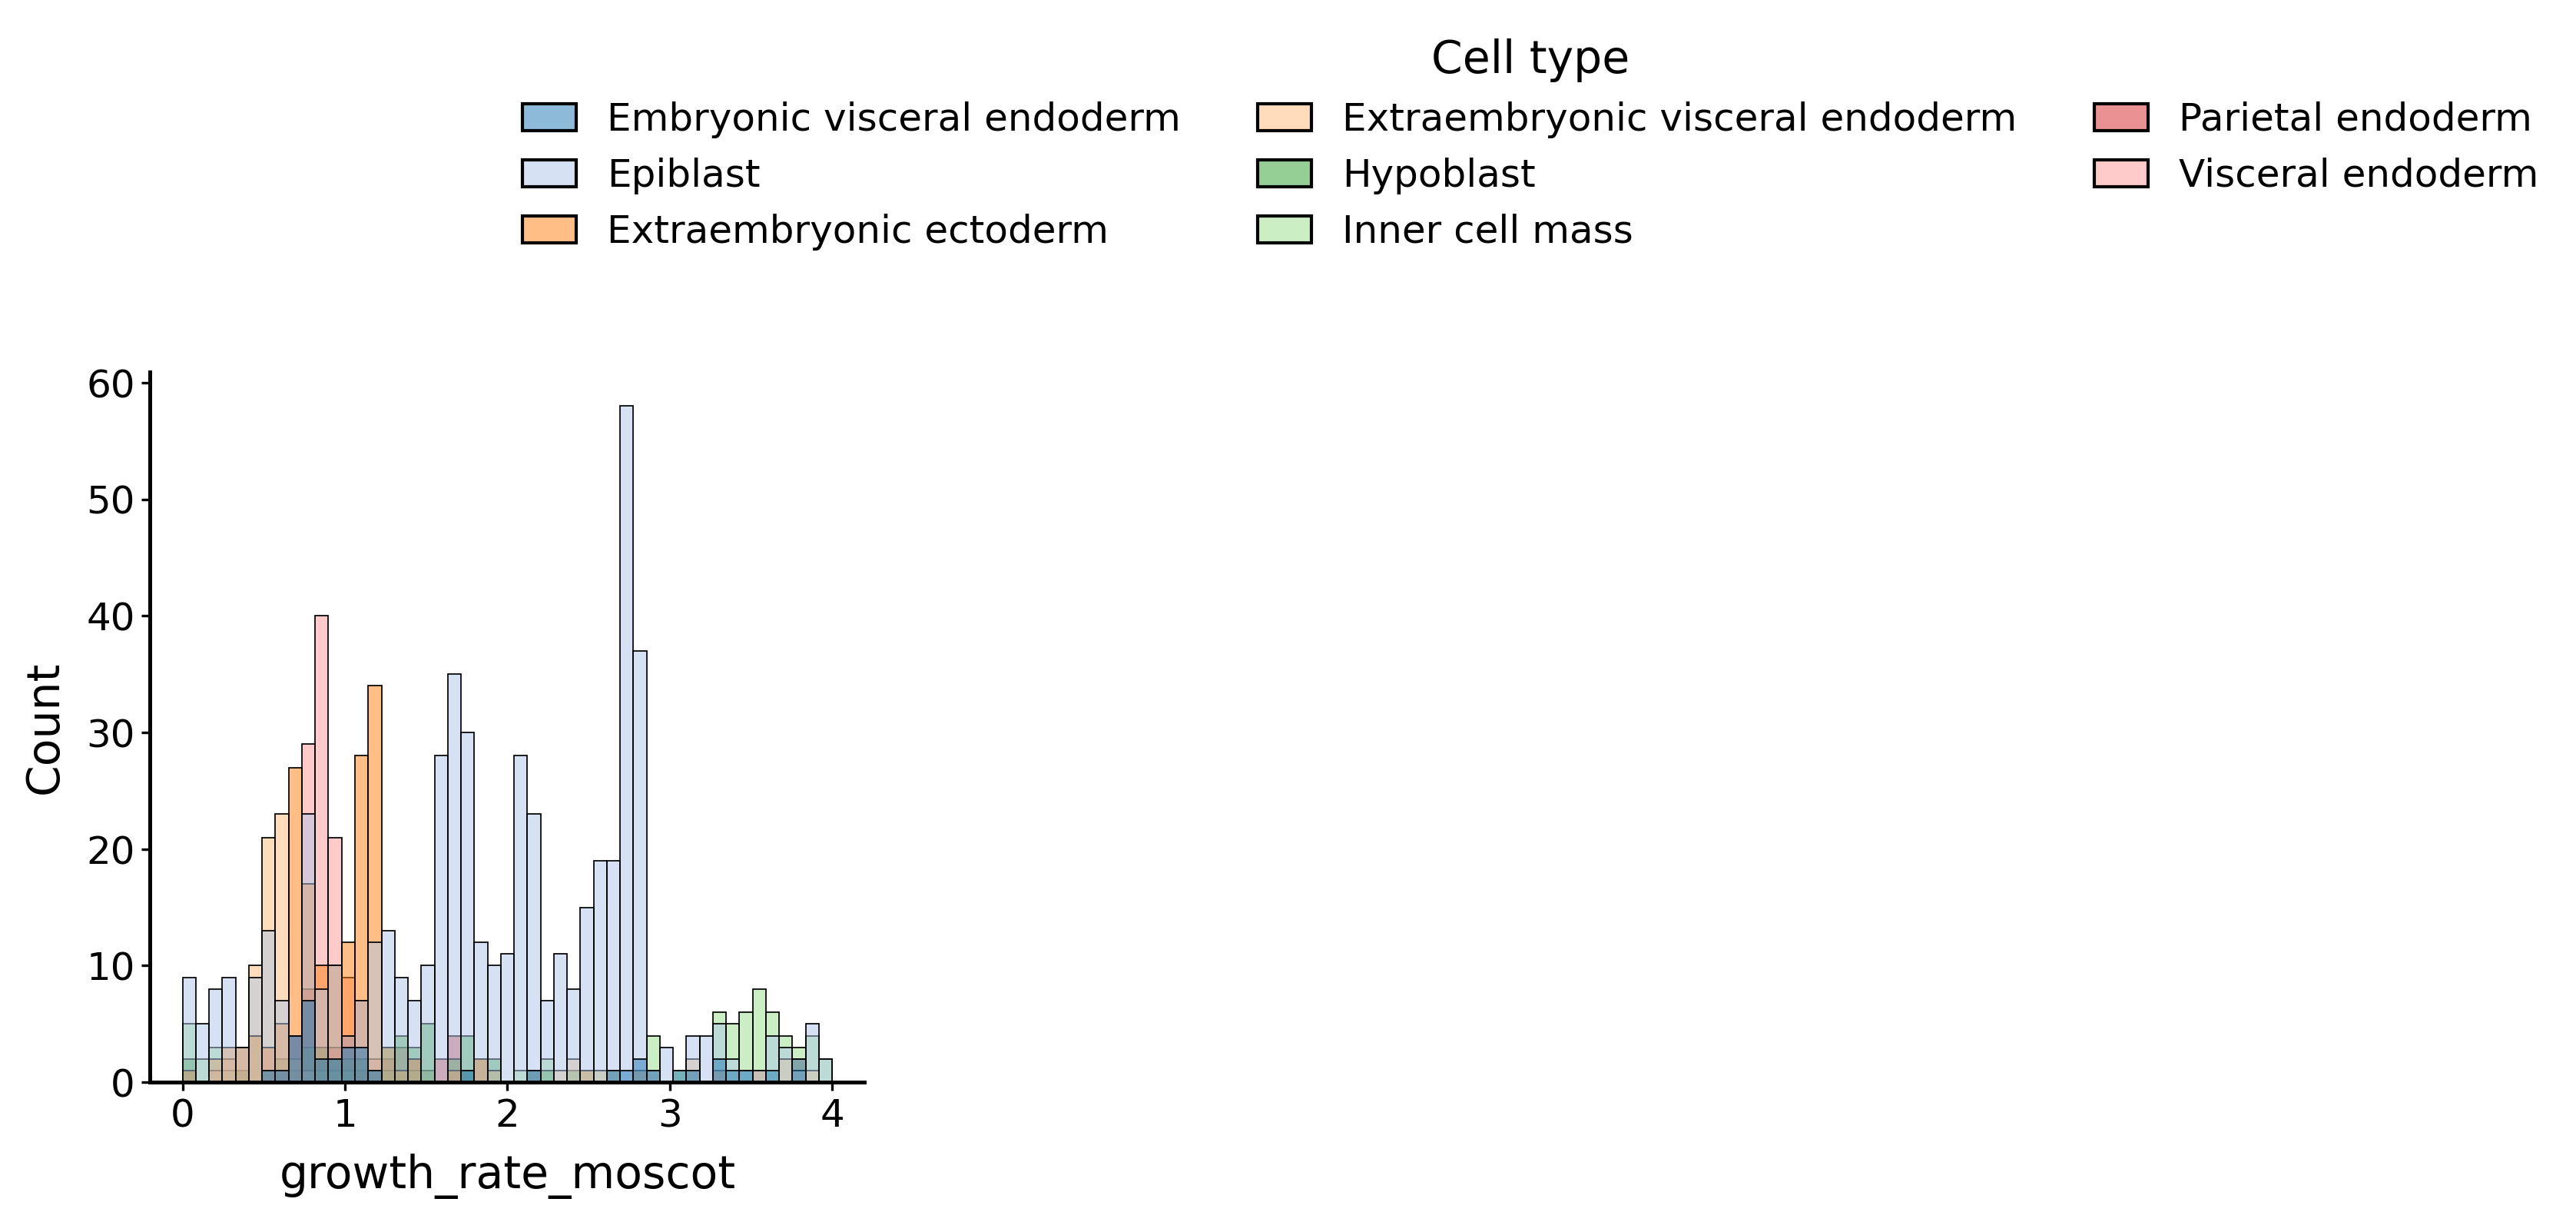

In [12]:
# The legend
frames=[]
for i in range(n0,n1):
    frames.append(T[i])
df=pd.concat(frames)
df=df.sort_values('Cell type')
local_palette=[D_color[a] for a in sorted(list(set(df['Cell type'])))]

ax=sns.histplot(data=df, x="growth_rate_moscot", hue='Cell type', palette=local_palette, bins=np.linspace(0,4,50))
sns.move_legend(ax, (2,0), bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.setp(ax.get_legend().get_title(), fontsize='14')

# Gastrulation

In [13]:
n0=5
n1=13

cell_types=[]

for i in range(n0,n1):
    df=T[i]
    cell_types=[*cell_types, *list(set(df['cell_type']))]
cell_types=sorted(list(set(cell_types)))
D_color={}

for i,ct in zip(range(len(cell_types)),cell_types):
    D_color[ct]=palette[i]

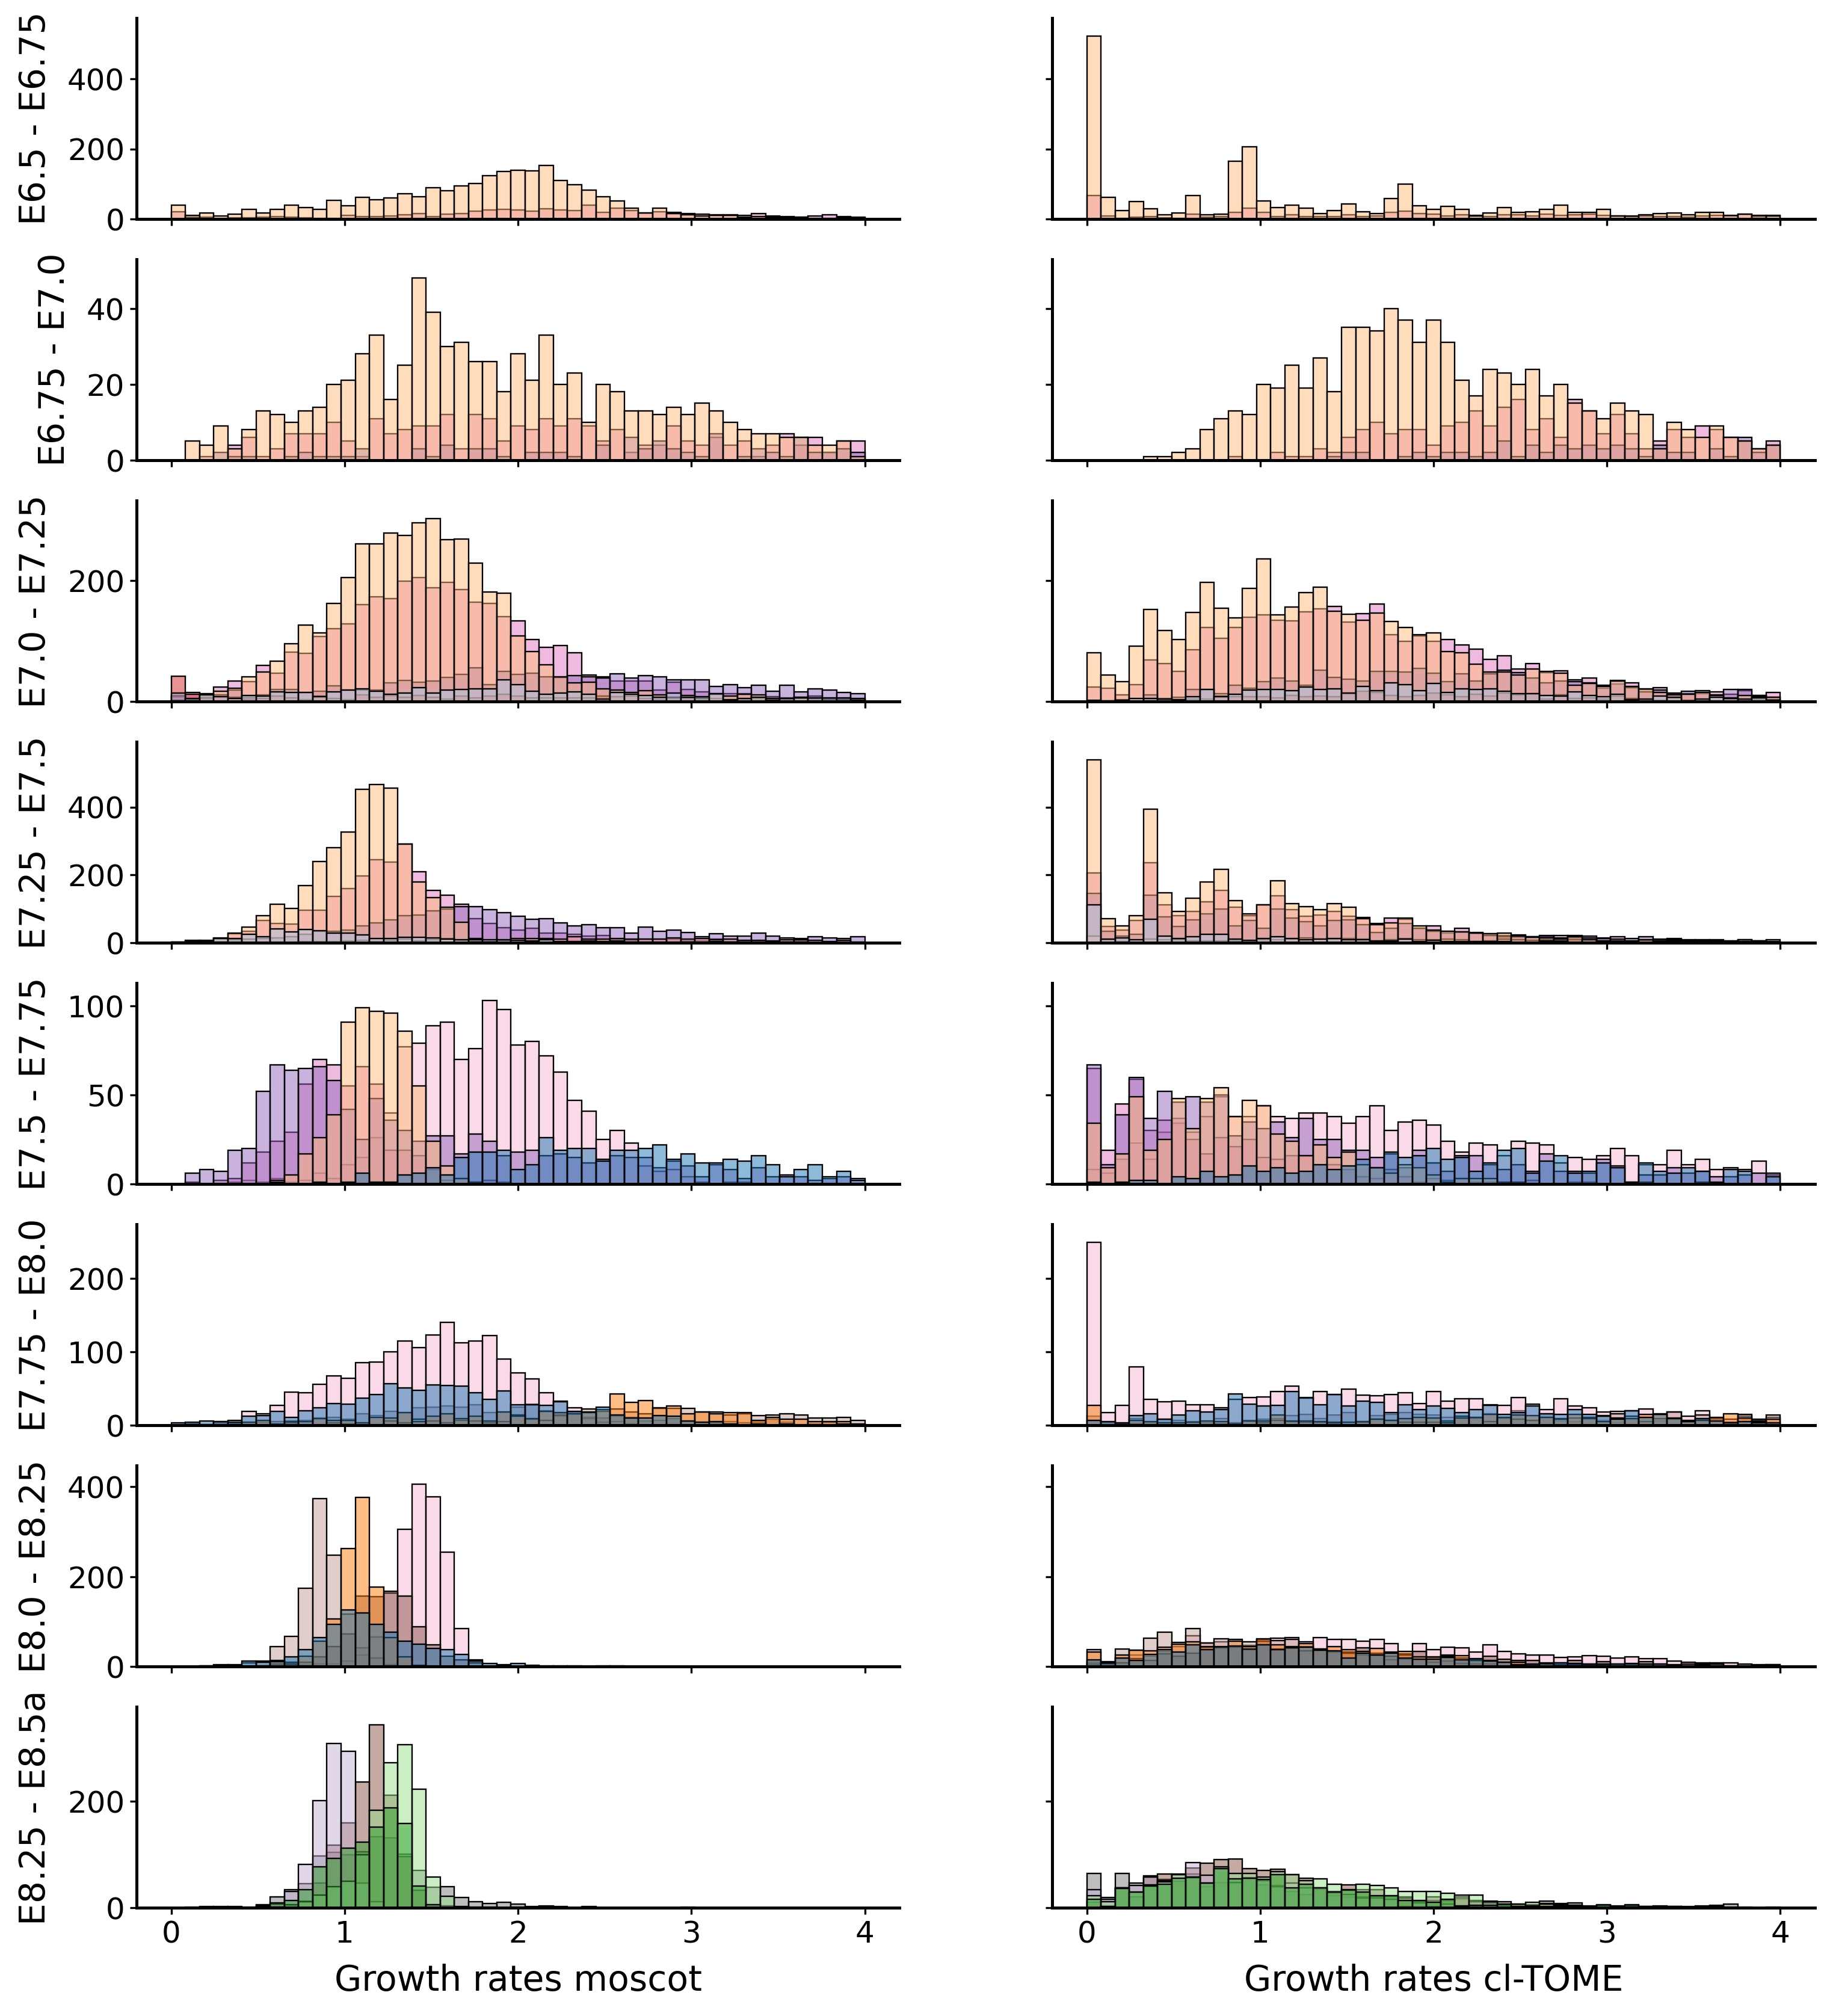

In [14]:
xmax=4

fig, axs = plt.subplots(n1-n0, 2, figsize=(12, (n1-n0)*1.7))

for i in range(n0,n1):
    df=T[i]
    df=df.sort_values('Cell type')
    local_palette=[D_color[a] for a in sorted(list(set(df['Cell type'])))]
    
    
    ylim=int(round(get_ylim(df, xmax)*1.1))

    g0=sns.histplot(data=df, x="growth_rate_moscot", hue='Cell type', palette=local_palette, bins=np.linspace(0,4,50), ax=axs[i-n0, 0])
    axs[i-n0, 0].legend_.remove()
    axs[i-n0, 0].set_ylim(0, ylim)
    if i<n1-1:
        g0.set(xticklabels=[])  # remove the tick labels
        g0.set(xlabel=None)  # remove the axis label
    else:
        g0.set(xlabel='Growth rates moscot')  # remove the axis label

    g0.set(ylabel=f'{ts[i]} - {ts[i+1]}')
    
    g1=sns.histplot(data=df, x="growth_rate_clTOME", hue='Cell type', palette=local_palette, bins=np.linspace(0,4,50), ax=axs[i-n0, 1])
    #sns.move_legend(g1,(1,0))
    plt.setp(g1.get_legend().get_title(), fontsize='12')
    axs[i-n0, 1].legend_.remove()
    
    if i<n1-1:
        g1.set(xticklabels=[])  # remove the tick labels
        g1.set(xlabel=None)  # remove the axis label
    else:
        g1.set(xlabel='Growth rates cl-TOME')  # remove the axis label
    g1.set(yticklabels=[])  # remove the tick labels
    g1.set(ylabel=None)  # remove the axis label
    
    axs[i-n0, 1].set_ylim(0, ylim)
plt.show()

[None, None]

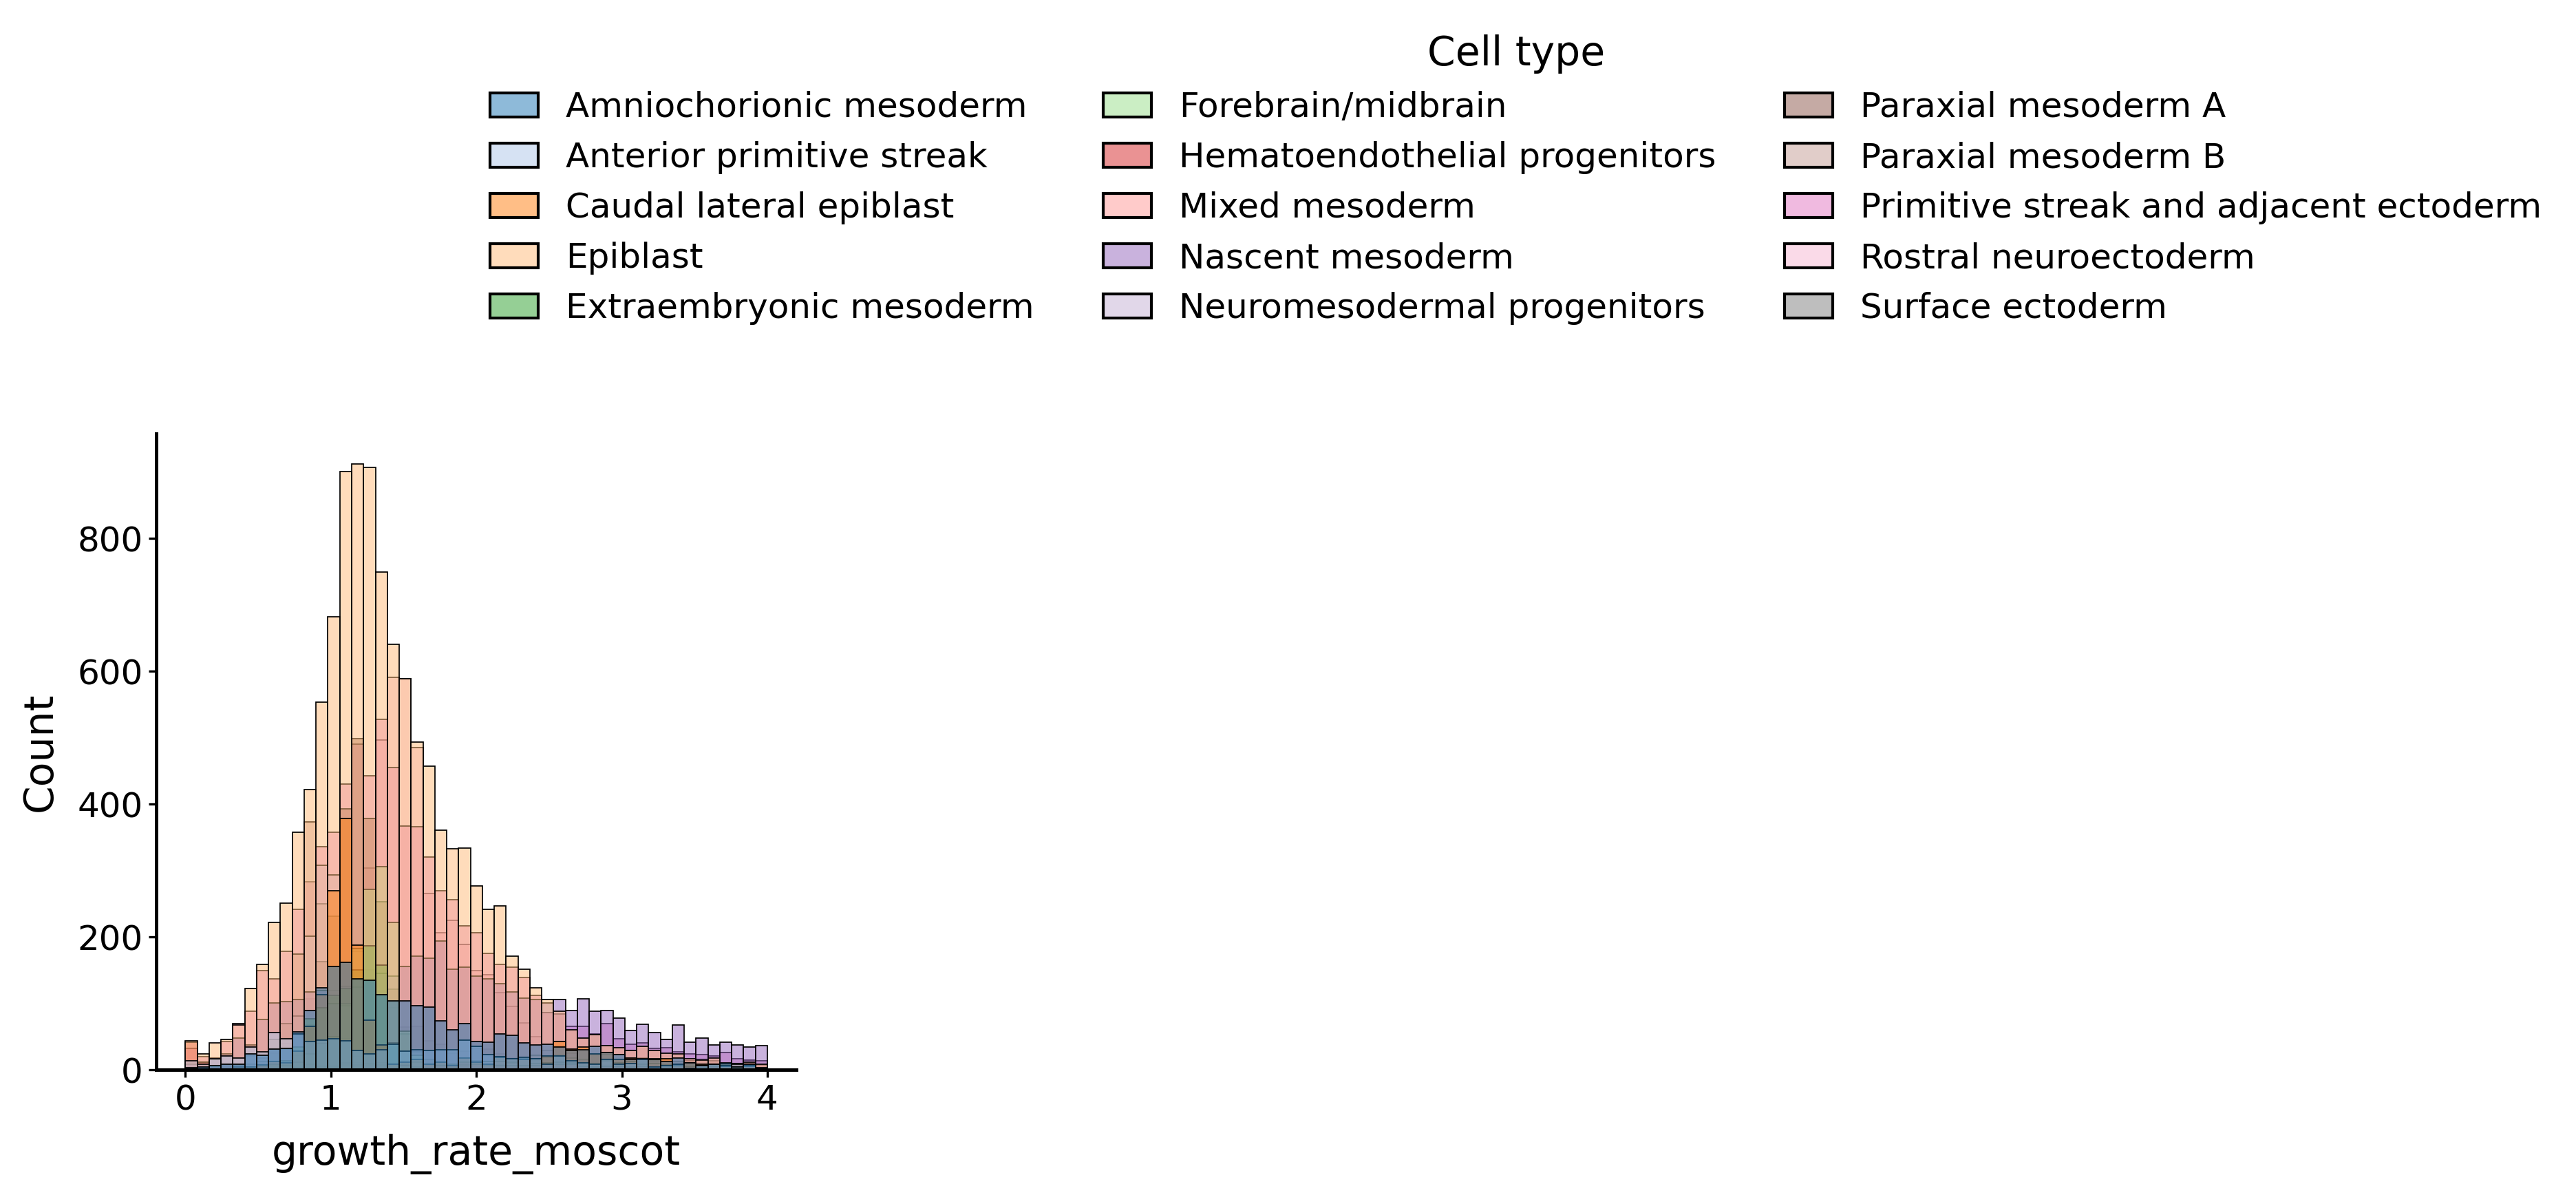

In [15]:
# The legend
frames=[]
for i in range(n0,n1):
    frames.append(T[i])
df=pd.concat(frames)
df=df.sort_values('Cell type')
local_palette=[D_color[a] for a in sorted(list(set(df['Cell type'])))]

ax=sns.histplot(data=df, x="growth_rate_moscot", hue='Cell type', palette=local_palette, bins=np.linspace(0,4,50))
sns.move_legend(ax, (2,0), bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.setp(ax.get_legend().get_title(), fontsize='14')

# Organogenesis

In [16]:
n0=13
n1=19

cell_types=[]

for i in range(n0,n1):
    df=T[i]
    cell_types=[*cell_types, *list(set(df['cell_type']))]
cell_types=sorted(list(set(cell_types)))
D_color={}

for i,ct in zip(range(len(cell_types)),cell_types):
    D_color[ct]=palette[i]

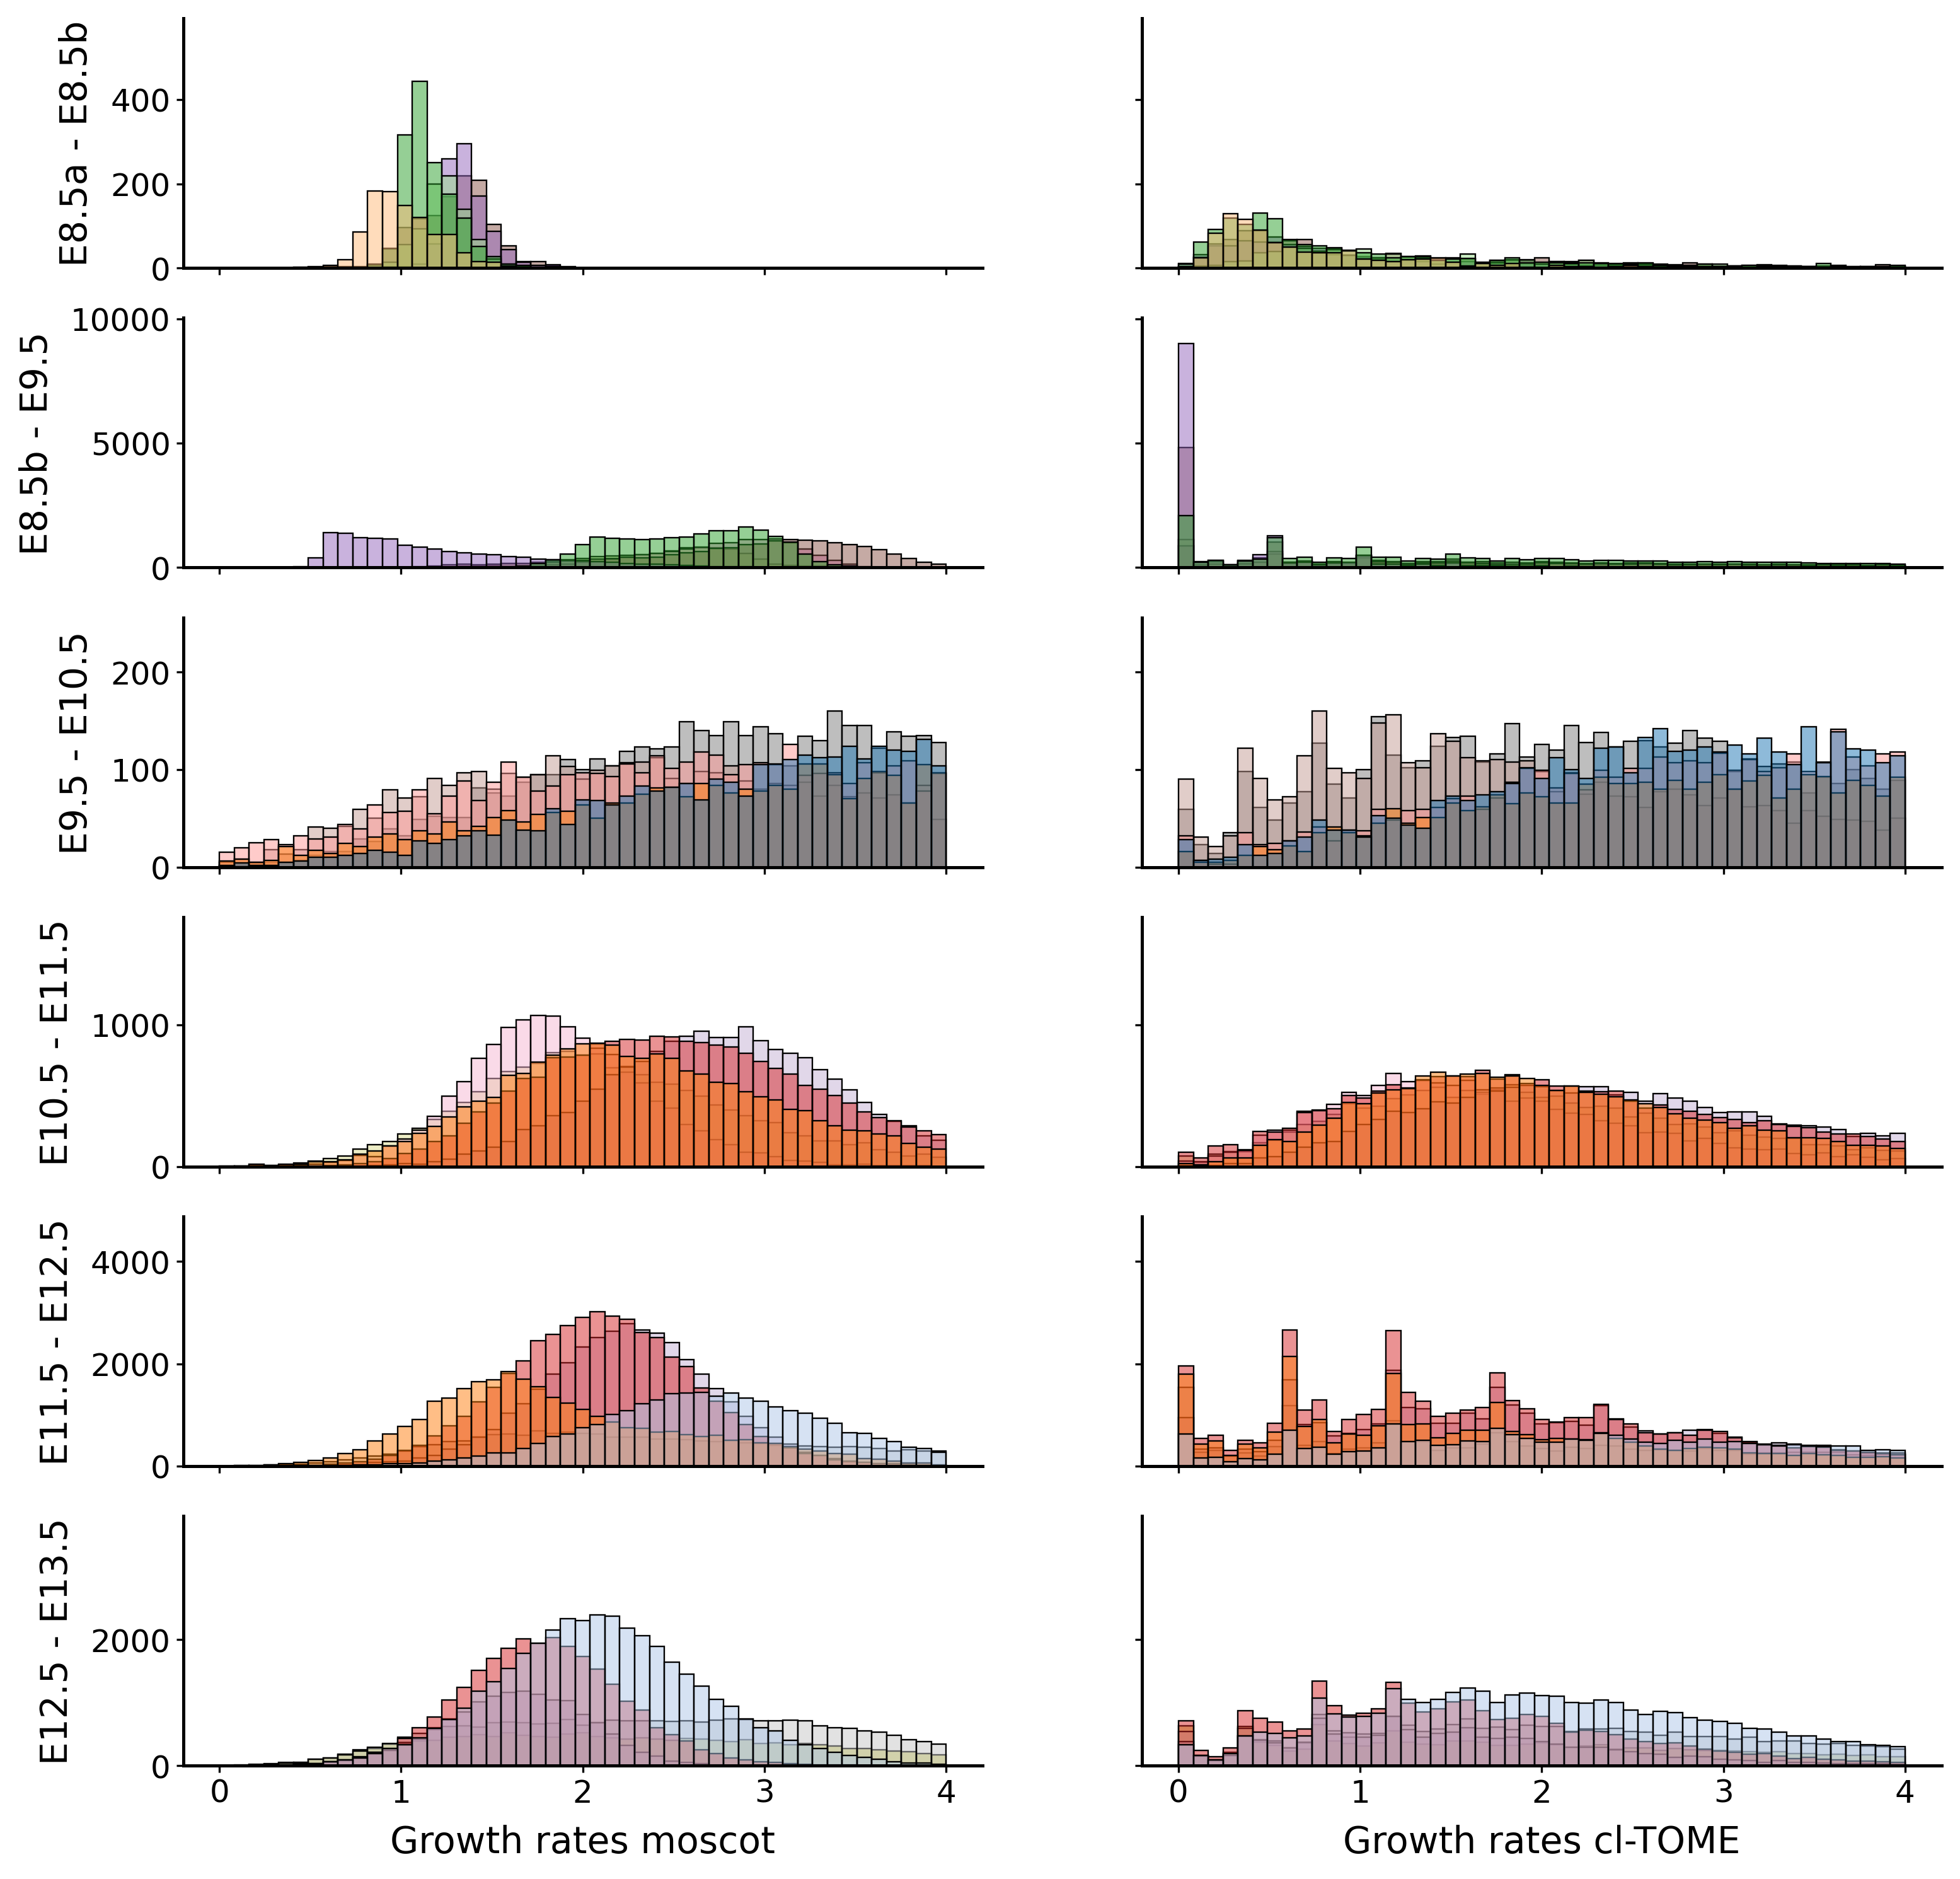

In [17]:
xmax=6

fig, axs = plt.subplots(n1-n0, 2, figsize=(12, (n1-n0)*2))

for i in range(n0,n1):
    df=T[i]
    df=df.sort_values('Cell type')
    local_palette=[D_color[a] for a in sorted(list(set(df['Cell type'])))]
    
    
    ylim=int(round(get_ylim(df, xmax)*1.1))

    g0=sns.histplot(data=df, x="growth_rate_moscot", hue='Cell type', palette=local_palette, bins=np.linspace(0,4,50), ax=axs[i-n0, 0])
    axs[i-n0, 0].legend_.remove()
    axs[i-n0, 0].set_ylim(0, ylim)
    if i<n1-1:
        g0.set(xticklabels=[])  # remove the tick labels
        g0.set(xlabel=None)  # remove the axis label
    else:
        g0.set(xlabel='Growth rates moscot')  # remove the axis label

    g0.set(ylabel=f'{ts[i]} - {ts[i+1]}')
    
    g1=sns.histplot(data=df, x="growth_rate_clTOME", hue='Cell type', palette=local_palette, bins=np.linspace(0,4,50), ax=axs[i-n0, 1])
    #sns.move_legend(g1,(1,0))
    plt.setp(g1.get_legend().get_title(), fontsize='12')
    axs[i-n0, 1].legend_.remove()
    
    if i<n1-1:
        g1.set(xticklabels=[])  # remove the tick labels
        g1.set(xlabel=None)  # remove the axis label
    else:
        g1.set(xlabel='Growth rates cl-TOME')  # remove the axis label
    g1.set(yticklabels=[])  # remove the tick labels
    g1.set(ylabel=None)  # remove the axis label
    
    axs[i-n0, 1].set_ylim(0, ylim)
plt.show()

[None, None]

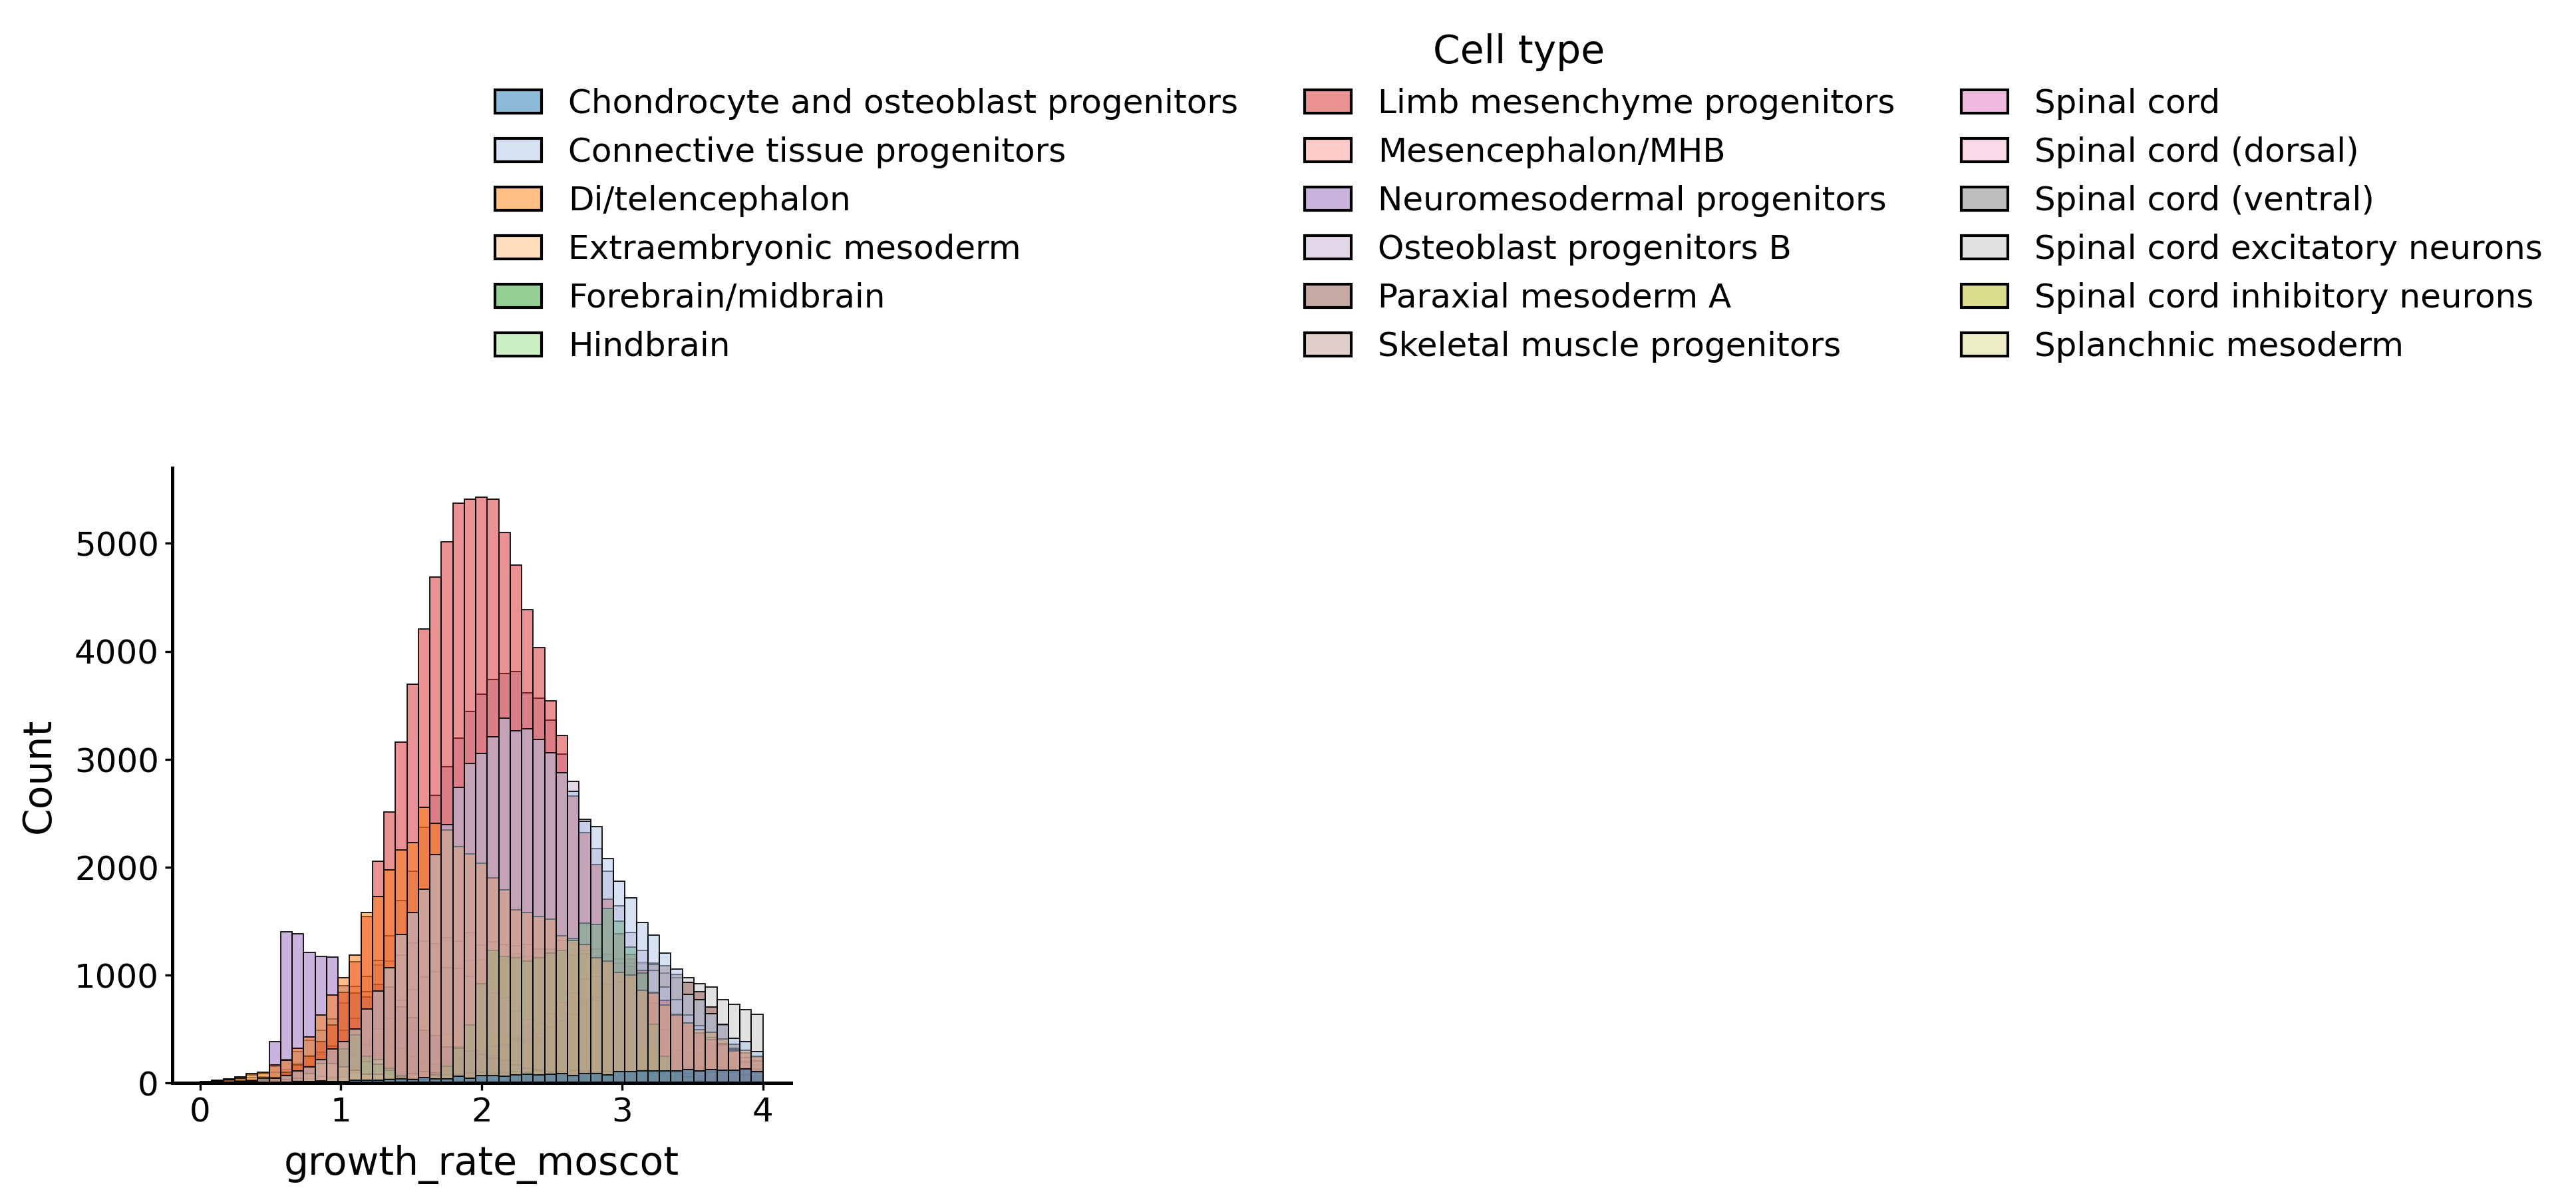

In [18]:
# The legend
frames=[]
for i in range(n0,n1):
    frames.append(T[i])
df=pd.concat(frames)
df=df.sort_values('Cell type')
local_palette=[D_color[a] for a in sorted(list(set(df['Cell type'])))]

ax=sns.histplot(data=df, x="growth_rate_moscot", hue='Cell type', palette=local_palette, bins=np.linspace(0,4,50))
sns.move_legend(ax, (2,0), bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.setp(ax.get_legend().get_title(), fontsize='14')